<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week09/kmeans_find_k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans: Find K
- Michael Vincent
- 8/14

## Imports

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load the data

In [ ]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQAN-9j-p2mev8feKxRp9l8cfRjisQwl39X31e7iRtYLy0ICRk0harNzLHreWiDJMHqucLfGCYSZlR6/pub?output=csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


## Clean and process the data

In [ ]:
# Check for duplicates and missing values.
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicates: 0
Missing Values: 150


In [ ]:
# Drop the Unnamed: 0 column and the customer id column.
df.drop(columns = ['Unnamed: 0', 'Customer Id'], inplace = True)

# Make sure the column was dropped.
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
# Check the missing values more carefully
print(df.isna().sum())
print()
df['Defaulted'].value_counts()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64



0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [ ]:
# Impute the missing values in 'Defaulted' with the 
# most frequent value.
df['Defaulted'].fillna(0, inplace = True)

# Make sure the values were imputed
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [ ]:
# Create a scaled copy of the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## KMeans

In [ ]:
# Create lists of inertias and silhouette scores
inertias = []
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

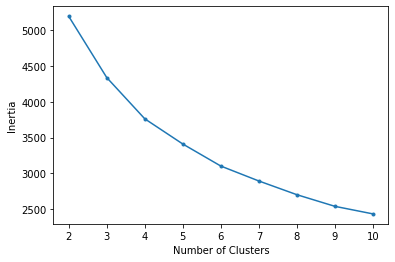

In [ ]:
# Graph the inertias
plt.plot(range(2, 11), inertias, marker = '.');
plt.xlabel('Number of Clusters');
plt.ylabel('Inertia');

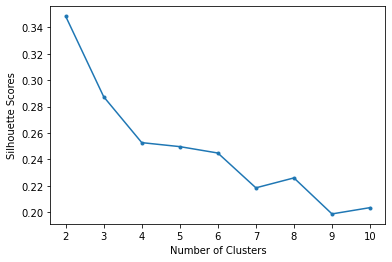

In [ ]:
# Graph the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker = '.');
plt.xlabel('Number of Clusters');
plt.ylabel('Silhouette Scores');

## Visualizations

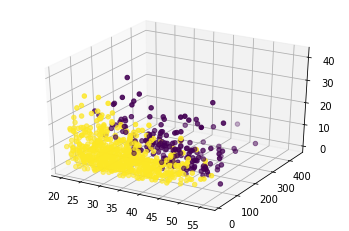

In [ ]:
# Create a 3D visulization using 'Age', 'Income', 
# and 'DebtIncomeRatio' using 2 clusters
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
df['clusters'] = kmeans.labels_
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter(df['Age'], df['Income'], df['DebtIncomeRatio'], c = df['clusters'])

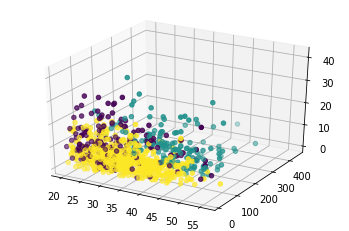

In [ ]:
# Create a 3D visulization using 'Age', 'Income', 
# and 'DebtIncomeRatio' using 3 clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)
df['clusters'] = kmeans.labels_
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter(df['Age'], df['Income'], df['DebtIncomeRatio'], c = df['clusters'])

## Final Model

While _k_ = 2 gives the best silhouette score, we think _k_ = 3 gives the best compromise between the silhouette score and the inertia. 

In [ ]:
# Build the final model
final_model = KMeans(n_clusters = 3)
final_model.fit(scaled_df)
print('Intertia:', final_model.inertia_)
print('Silhouette Score:', silhouette_score(scaled_df, final_model.labels_))

Intertia: 4339.0172944029855
Silhouette Score: 0.28738683325129355
